In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

df = pd.read_csv('hazzlenuts.txt',header = None,sep = '	').transpose()

df.columns = ['sample_id', 'length', 'width', 'thickness', 'surface_area', 'mass', 'compactness', 'hardness', 'shell_radius', 'water_content', 'carbohydrate', 'variety']

In [3]:
df.head(5)

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_radius,water_content,carbohydrate,variety
0,71,11.67,12.8025,8.055074738,34.65,1375.5,0.93005,19.145,4.4604,0.048667685,0.175,c_avellana
1,72,13.86,13.0995,7.349906812,38.1,1439.55,0.93401,8.78,4.7844,0.048826089,0.167,c_avellana
2,1,20.53,15.5925,9.565426582,49.89,1623.3,0.96217,5.12,5.2893,0.049521325,0.174,c_americana
3,73,14.13,12.222,7.182948645,35.43,1412.25,0.90178,13.694,4.8168,0.049594663,0.167,c_avellana
4,2,15.85,14.724,8.622661318,43.29,1512,0.96261,10.925,4.6296,0.050384315,0.173,c_americana


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 12 columns):
sample_id        201 non-null object
length           201 non-null object
width            201 non-null object
thickness        201 non-null object
surface_area     201 non-null object
mass             201 non-null object
compactness      201 non-null object
hardness         201 non-null object
shell_radius     201 non-null object
water_content    201 non-null object
carbohydrate     201 non-null object
variety          201 non-null object
dtypes: object(12)
memory usage: 20.4+ KB


In [5]:
df.width.max()

'18.1485'

In [6]:
df.dtypes

sample_id        object
length           object
width            object
thickness        object
surface_area     object
mass             object
compactness      object
hardness         object
shell_radius     object
water_content    object
carbohydrate     object
variety          object
dtype: object

In [7]:
for col in df.columns[0:len(df.columns) - 1]:
    df[col] = pd.to_numeric(df[col])

In [8]:
df.dtypes

sample_id          int64
length           float64
width            float64
thickness        float64
surface_area     float64
mass             float64
compactness      float64
hardness         float64
shell_radius     float64
water_content    float64
carbohydrate     float64
variety           object
dtype: object

In [9]:
df.describe()

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_radius,water_content,carbohydrate
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,101.000000,16.230547,14.691403,8.656044,44.582388,1528.726866,0.959193,10.042869,4.857443,0.074158,0.170736
std,58.167861,4.339335,1.684958,0.971562,8.638540,135.471589,0.025589,4.561621,0.435869,0.015144,0.002887
min,1.000000,8.990000,11.835000,6.733252,31.770000,1303.050000,0.888910,1.295300,4.067100,0.048668,0.166000
25%,51.000000,12.620000,13.320000,7.864724,37.110000,1414.350000,0.944240,6.512000,4.539600,0.060596,0.168000
50%,101.000000,15.270000,14.589000,8.663378,43.110000,1506.750000,0.962170,9.758000,4.699800,0.073352,0.171000
75%,151.000000,19.790000,16.033500,9.483580,51.780000,1645.350000,0.976800,13.268000,5.289300,0.088250,0.173000
max,201.000000,26.750000,18.148500,10.804900,63.540000,1811.250000,1.010130,24.368000,5.895000,0.100875,0.175000


In [10]:
df['variety'].value_counts() # To check if oour data is skewed towards particular class or not

c_americana    70
c_cornuta      66
c_avellana     65
Name: variety, dtype: int64

In [11]:
corr_matrix = df.iloc[: , 1: ].corr() # neglecting sample_id column as its not needed
corr_matrix[(corr_matrix < -0.95) | (corr_matrix > 0.95)  ] # viewing both positive and negative correlation

,length,width,thickness,surface_area,mass,compactness,hardness,shell_radius,water_content,carbohydrate
length,1.000000,NaN,NaN,0.952116,0.973498,NaN,NaN,NaN,NaN,NaN
width,NaN,1.000000,0.954332,0.971469,NaN,NaN,NaN,NaN,NaN,NaN
thickness,NaN,0.954332,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surface_area,0.952116,0.971469,NaN,1.000000,0.994397,NaN,NaN,NaN,NaN,NaN
mass,0.973498,NaN,NaN,0.994397,1.000000,NaN,NaN,NaN,NaN,NaN
compactness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
hardness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
shell_radius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
water_content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
carbohydrate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Observed that 'mass' & 'surface_area' are highly correlated

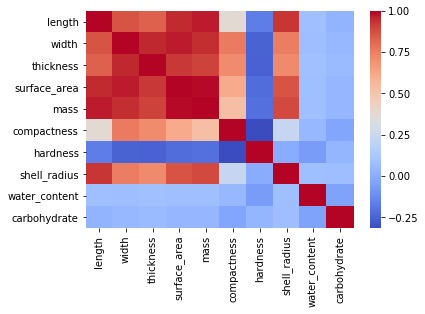

In [12]:
sns.heatmap(corr_matrix,cmap="coolwarm")

In [13]:
#sns.pairplot(df)

In [14]:
df['variety'].unique()
class_dict = {'c_avellana':0, 'c_americana':1, 'c_cornuta':2}
df['variety'] = df['variety'].apply(lambda x : class_dict[x])

In [15]:
x = df.iloc[:, [1,2,3,5,6,7,8,9,10]].values
y = df.iloc[:, 11].values

In [16]:
y

array([0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0,
       1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2,
       2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2,
       0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1,
       2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1,
       2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2,
       1, 2, 2], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [18]:
x_train.tolist()[1]


[14.79,
 14.202,
 8.864132181,
 1476.3,
 0.96349,
 8.408,
 4.3848,
 0.09532191699999999,
 0.17300000000000001]

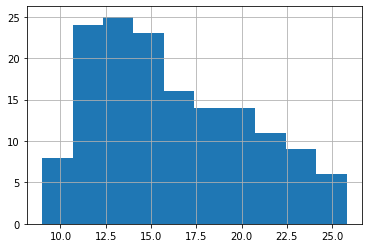

In [19]:
pd.DataFrame(x_train).loc[:,0].hist()

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) #For decision tree scaling is not necessary
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.425817,0.437247,0.464608,0.435579,0.560799,0.379146,0.443281,0.489855,0.525926
std,0.251531,0.268656,0.241586,0.264618,0.217149,0.196413,0.236334,0.291140,0.321996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217262,0.199358,0.263840,0.215393,0.437613,0.233937,0.268696,0.228750,0.222222
50%,0.379167,0.429030,0.477424,0.410124,0.582577,0.367016,0.359020,0.471031,0.555556
75%,0.634673,0.657632,0.673345,0.670971,0.710526,0.521408,0.682415,0.760443,0.861111
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


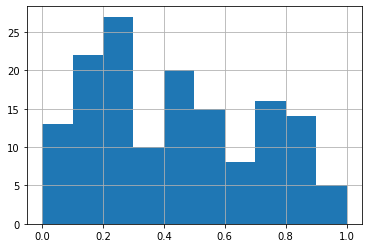

In [21]:
pd.DataFrame(x_train).loc[:,3].hist()

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 7,metric = 'minkowski', p = 2,weights='distance')
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 9, criterion = 'entropy', random_state = 0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier(max_depth=5,learning_rate=0.01,n_estimators=75,subsample=.7)
classifier_xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=75, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [27]:
y_pred = classifier.predict(x_test)
y_pred_knn = classifier_knn.predict(x_test)
y_pred_rf = classifier_rf.predict(x_test)
y_pred_nb = classifier_rf.predict(x_test)
y_pred_xg = classifier_xg.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_xg = confusion_matrix(y_test,y_pred_xg)

In [29]:
pd.DataFrame(cm_knn,columns=['c_avellana', 'c_americana', 'c_cornuta'],index = ['c_avellana', 'c_americana', 'c_cornuta'])

,c_avellana,c_americana,c_cornuta
c_avellana,14,2,0
c_americana,0,17,0
c_cornuta,0,1,17


In [30]:
# Visualize data
import pydotplus
from sklearn import tree
import collections
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_data = tree.export_graphviz(classifier,
                                feature_names=['length', 'width', 'thickness', 'mass', 'compactness', 'hardness', 'shell_radius', 'water_content', 'carbohydrate'],
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

In [31]:
cm_rf

array([[11,  5,  0],
       [ 0, 17,  0],
       [ 0,  0, 18]], dtype=int64)

In [32]:
cm_nb

array([[11,  5,  0],
       [ 0, 17,  0],
       [ 0,  0, 18]], dtype=int64)

In [33]:
y_pred

array([0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0,
       1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 1, 2, 1], dtype=int64)

In [34]:
cm_xg

array([[11,  5,  0],
       [ 0, 17,  0],
       [ 0,  0, 18]], dtype=int64)

In [35]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn, target_names=['c_avellana', 'c_americana', 'c_cornuta']))

              precision    recall  f1-score   support

  c_avellana       1.00      0.88      0.93        16
 c_americana       0.85      1.00      0.92        17
   c_cornuta       1.00      0.94      0.97        18

    accuracy                           0.94        51
   macro avg       0.95      0.94      0.94        51
weighted avg       0.95      0.94      0.94        51



In [36]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.803921568627451

In [37]:
metrics.accuracy_score(y_test, y_pred_knn)

0.9411764705882353

In [38]:
metrics.accuracy_score(y_test, y_pred_rf)

0.9019607843137255

In [39]:
metrics.accuracy_score(y_test, y_pred_nb)

0.9019607843137255

In [40]:
metrics.accuracy_score(y_test, y_pred_xg)

0.9019607843137255

Accuracy increased by 2% after removing 'surface_area' column from training set bcz of its corr with mass.

In [41]:
from sklearn.model_selection import cross_val_score,cross_val_predict
accuracies_xg = cross_val_score(estimator = classifier, X = x, y = y, cv = 10)
accuracies_xg.mean()

0.8809649122807018

In [42]:
accuracies_knn = cross_val_score(estimator = classifier_knn, X = x, y = y, cv = 10)
accuracies_knn.mean()

0.859674185463659

K - fold cross validation gives mean accuracy

In [44]:
predicted = classifier_rf.predict_proba(x_test)
predicted

array([[0.66666667, 0.22222222, 0.11111111],
       [0.11111111, 0.        , 0.88888889],
       [0.        , 0.77777778, 0.22222222],
       [0.22222222, 0.66666667, 0.11111111],
       [0.11111111, 0.11111111, 0.77777778],
       [0.        , 0.11111111, 0.88888889],
       [0.11111111, 0.11111111, 0.77777778],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.88888889, 0.11111111, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.44444444, 0.55555556, 0.        ],
       [0.11111111, 0.        , 0.88888889],
       [0.        , 0.        , 1.        ],
       [0.11111111, 0.66666667, 0.22222222],
       [0.44444444, 0.55555556, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.22222222, 0.77777778],
       [1.        , 0.        , 0.        ],
       [0.88888889, 0.        , 0.11111111],
       [0.        , 0.        , 1.        ],
       [0.33333333, 0.66666667, 0.        ],
       [0.

In [45]:
acc_df = pd.DataFrame(columns=['model','k-fold','error'])
for k,i in enumerate(accuracies_knn):
    acc_df = acc_df.append({'model':'knn','k-fold':k+1,'error':1-i},ignore_index = True)
for k,i in enumerate(accuracies_xg):
    acc_df = acc_df.append({'model':'xgboost','k-fold':k+1,'error':1-i},ignore_index = True)

acc_df

,model,k-fold,error
0,knn,1,0.095238
1,knn,2,0.142857
2,knn,3,0.142857
3,knn,4,0.142857
4,knn,5,0.095238
5,knn,6,0.100000
6,knn,7,0.210526
7,knn,8,0.105263
8,knn,9,0.105263
9,knn,10,0.263158


(0.0, 0.27)

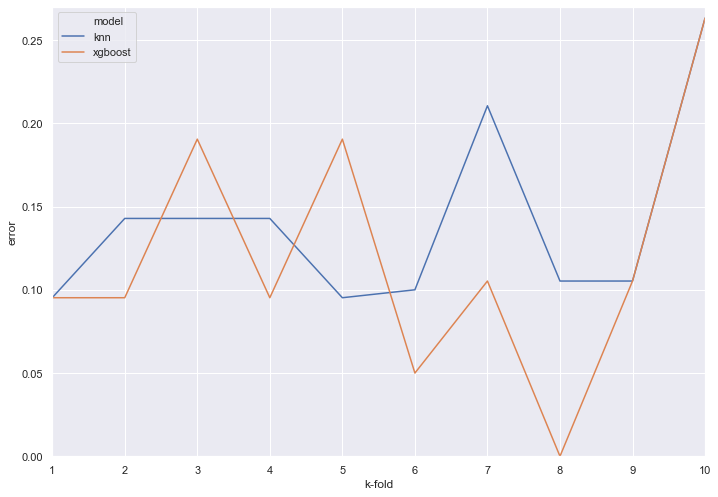

In [46]:

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)}) #plotsize
plot  = sns.lineplot(x='k-fold',y='error',hue='model',markers=True, dashes=False,data = acc_df,)
plot.set_xlim([1,10])
plot.set_ylim([0.00,0.270])

In [47]:
accuracies_knn

array([0.9047619 , 0.85714286, 0.85714286, 0.85714286, 0.9047619 ,
       0.9       , 0.78947368, 0.89473684, 0.89473684, 0.73684211])

In [48]:
accuracies_xg

array([0.9047619 , 0.9047619 , 0.80952381, 0.9047619 , 0.80952381,
       0.95      , 0.89473684, 1.        , 0.89473684, 0.73684211])

In [49]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,model_name, test_idx=None, resolution=0.02):
    sns.set()
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'darkgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape) 
    plt.contourf(xx1, xx2, Z, alpha=0.4 ,cmap=cmap)
    plt.xlim(xx1.min()+0.5, xx1.max()-0.5)
    plt.ylim(xx2.min()+0.5, xx2.max()-0.5)
    plt.xlabel('Width')
    plt.ylabel('Thickness')
    plt.title(model_name)

    scatter_plots = []
    for idx, cl in enumerate(np.unique(y)):
        scatter_plots.append(plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl))
    legends = set(y)
    plt.legend(tuple(scatter_plots),(list(class_dict.keys())[i] for i in legends))

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn_visualise = KNeighborsClassifier(n_neighbors = 10,metric = 'minkowski', p = 2,weights='distance')
classifier_knn_visualise.fit(x_train[:,[1,2]], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [51]:
from xgboost import XGBClassifier
classifier_xg_visualise = XGBClassifier(max_depth=3,learning_rate=0.01,n_estimators=10,subsample=.7)
classifier_xg_visualise.fit(x_train[:,[1,2]], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


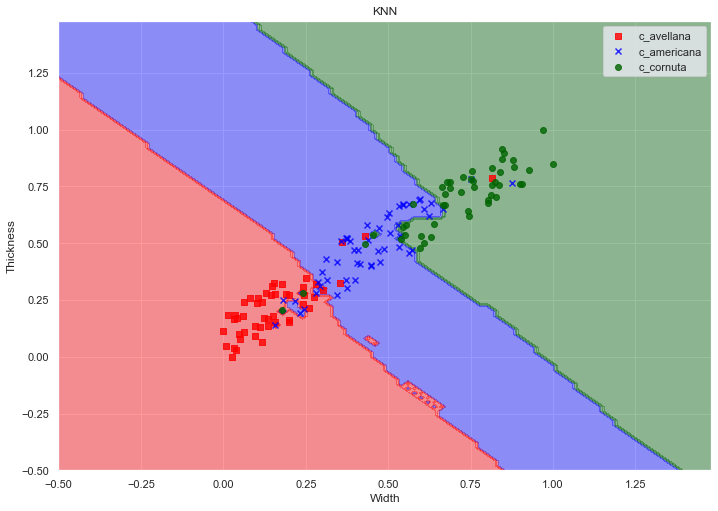

In [52]:
plot_decision_regions(x_train[:,[1,2]],y_train,classifier_knn_visualise,'KNN')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


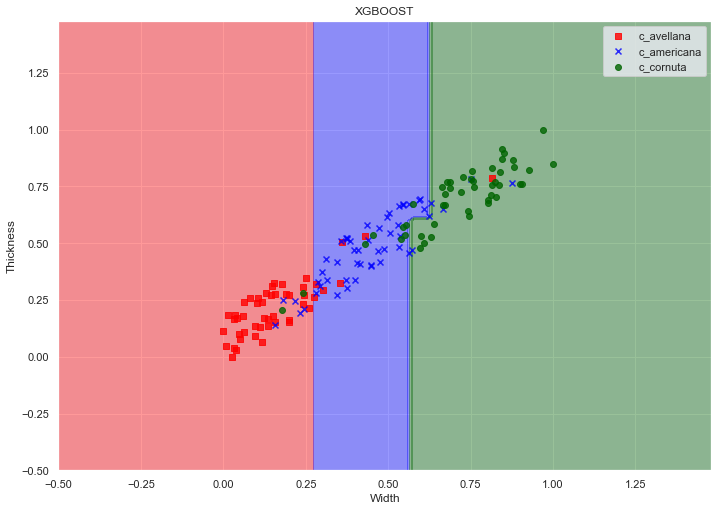

In [53]:
plot_decision_regions(x_train[:,[1,2]],y_train,classifier_xg_visualise,'XGBOOST')

In [54]:
import math
def distance_calculation(ip_arr,train_data,train_label):
    if len(ip_arr.tolist()[1]) == len(train_data.tolist()[1]):
        train_label = train_label.tolist()
        op_dict = {}
        test_indexes,train_indexes,distance,label = [],[],[],[]
        for test_id,test_data_point in enumerate(ip_arr):
            for train_id,train_data_point in enumerate(train_data):
                euc = math.sqrt(np.sum((test_data_point - train_data_point)**2))
                test_indexes.append(test_id)
                train_indexes.append(train_id)
                distance.append(euc)
                label.append(train_label[train_id])
        op_dict['Test_ID'],op_dict['Train_ID'],op_dict['Distance'],op_dict['label']   = test_indexes,train_indexes,distance,label
        return pd.DataFrame(op_dict)
        
        
def k_neighbours(k,df):
    op = []
    for i in df['Test_ID'].sort_values().unique():
        mode = df[df['Test_ID'] == i].sort_values('Distance').head(k)['label'].mode().tolist()
        if len(mode) == 1:
            op.append(mode[0])
        else:
            op.append(mode[1])
    return np.array(op)
               
        

In [55]:
df_knn = distance_calculation(x_test,x_train,y_train)
df_knn
int(df_knn[df_knn['Test_ID'] == 0].sort_values('Distance').head(7)['label'].mode().astype(int))

0

In [56]:
y_train

array([2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0, 2,
       0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1,
       2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [57]:
op = k_neighbours(7,df_knn)
op

array([0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 0, 2, 1])

In [58]:
y_test

array([0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 1, 1, 0, 2, 1], dtype=int64)

In [59]:
confusion_matrix(y_test,op)

array([[14,  2,  0],
       [ 0, 17,  0],
       [ 0,  1, 17]], dtype=int64)

In [60]:
np.sum(confusion_matrix(y_test,op).diagonal()) / np.sum(confusion_matrix(y_test,op))

0.9411764705882353

In [61]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold
from statistics import mean

cv = KFold(n_splits=10,shuffle=True)

acc = []

for train_index, test_index in cv.split(x):
    train_x,train_y = [x[i,].tolist() for i in train_index],[y[i,].tolist() for i in train_index]
    test_x,test_y = [x[i,].tolist()  for i in test_index],[y[i,].tolist()  for i in test_index]
    sc = MinMaxScaler()
    train_x = sc.fit_transform(np.array(train_x))
    test_x = sc.transform(np.array(test_x))
    
    df = distance_calculation(np.array(test_x),np.array(train_x),np.array(train_y))
    
    op = k_neighbours(7,df)
    
    accuracy = np.sum(confusion_matrix(test_y,op).diagonal()) / np.sum(confusion_matrix(test_y,op))
    acc.append(accuracy)
    
print(mean(acc))
    
    
    

0.8952380952380953


In [62]:

df = pd.read_csv('hazzlenuts.txt',header = None,sep = '	').transpose()

df.columns = ['sample_id', 'length', 'width', 'thickness', 'surface_area', 'mass', 'compactness', 'hardness', 'shell_radius', 'water_content', 'carbohydrate', 'variety']

In [63]:
for col in df.columns[0:len(df.columns) - 1]:
    df[col] = pd.to_numeric(df[col])
df.head(5)

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_radius,water_content,carbohydrate,variety
0,71,11.67,12.8025,8.055075,34.65,1375.50,0.93005,19.145,4.4604,0.048668,0.175,c_avellana
1,72,13.86,13.0995,7.349907,38.10,1439.55,0.93401,8.780,4.7844,0.048826,0.167,c_avellana
2,1,20.53,15.5925,9.565427,49.89,1623.30,0.96217,5.120,5.2893,0.049521,0.174,c_americana
3,73,14.13,12.2220,7.182949,35.43,1412.25,0.90178,13.694,4.8168,0.049595,0.167,c_avellana
4,2,15.85,14.7240,8.622661,43.29,1512.00,0.96261,10.925,4.6296,0.050384,0.173,c_americana


In [64]:
df[['length','variety']].sort_values('length').iloc[150:,]

,length,variety
86,19.79,c_cornuta
14,19.79,c_cornuta
28,19.80,c_cornuta
76,19.98,c_cornuta
92,20.06,c_americana
189,20.17,c_cornuta
91,20.33,c_cornuta
156,20.37,c_cornuta
167,20.37,c_cornuta
143,20.51,c_cornuta


In [65]:
x

array([[11.67      , 12.8025    ,  8.05507474, ...,  4.4604    ,
         0.04866769,  0.175     ],
       [13.86      , 13.0995    ,  7.34990681, ...,  4.7844    ,
         0.04882609,  0.167     ],
       [20.53      , 15.5925    ,  9.56542658, ...,  5.2893    ,
         0.04952132,  0.174     ],
       ...,
       [15.85      , 14.175     ,  8.86102724, ...,  4.5108    ,
         0.10012315,  0.172     ],
       [21.83      , 17.559     ,  9.8283084 , ...,  5.3316    ,
         0.10056715,  0.174     ],
       [21.13      , 17.514     ,  9.83713182, ...,  5.4081    ,
         0.10087478,  0.175     ]])